<a href="https://colab.research.google.com/github/rajnish80130/Real-state-Capstone-Project/blob/main/first_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import numpy as np

In [168]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [169]:
df=pd.read_csv('/content/gurgaon_properties_cleaned_v1.csv')
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,la vida by tata housing,sector 113,3.0,14285.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up area: 2460 sq.ft. (228.54 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),3,3,3+,servant room,3.0,East,1 to 5 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [170]:
df.shape

(3799, 17)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3799 non-null   object 
 1   society          3798 non-null   object 
 2   sector           3799 non-null   object 
 3   price            3798 non-null   float64
 4   price_per_sqft   3798 non-null   float64
 5   area             3798 non-null   float64
 6   areaWithType     3799 non-null   object 
 7   bedRoom          3799 non-null   int64  
 8   bathroom         3799 non-null   int64  
 9   balcony          3799 non-null   object 
 10  additionalRoom   3799 non-null   object 
 11  floorNum         3779 non-null   float64
 12  facing           2699 non-null   object 
 13  agePossession    3798 non-null   object 
 14  nearbyLocations  3623 non-null   object 
 15  furnishDetails   2820 non-null   object 
 16  features         3167 non-null   object 
dtypes: float64(4),

In [172]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,1
price_per_sqft,1
area,1
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [173]:
df.duplicated().sum()

np.int64(134)

In [174]:
#focus is on -> areaWithType,additionalRoom,agePossession,furnishDetails,features

In [175]:
#areaWithType
df[['price','area','areaWithType']].sample(5)

,price,area,areaWithType
1113,3.15,2153.0,Carpet area: 200
2813,0.60,750.0,Carpet area: 750 (69.68 sq.m.)
1144,3.20,2000.0,Carpet area: 2002 (185.99 sq.m.)
1481,0.86,1103.0,Carpet area: 1103 (102.47 sq.m.)
1885,0.55,645.0,Super Built up area 1000(92.9 sq.m.)Carpet area: 645 sq.ft. (59.92 sq.m.)


In [176]:
df['areaWithType'].value_counts()

,count
areaWithType,
Plot area 360(301.01 sq.m.),37
Plot area 300(250.84 sq.m.),26
Plot area 200(167.23 sq.m.),20
Plot area 502(419.74 sq.m.),18
Super Built up area 1350(125.42 sq.m.),17
Super Built up area 1578(146.6 sq.m.),17
Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),17
Plot area 270(225.75 sq.m.),16
Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),15


In [177]:
# This function extracts the Super Built up area
import re
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [178]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [179]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [180]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

In [181]:
df[['price','area','areaWithType','super_built_up_area']].sample(5)

,price,area,areaWithType,super_built_up_area
3204,6.75,3500.0,Super Built up area 4250(394.84 sq.m.)Built Up area: 4000 sq.ft. (371.61 sq.m.)Carpet area: 3500 sq.ft. (325.16 sq.m.),4250.0
3521,4.95,2403.0,Plot area 267(223.25 sq.m.),NaN
1966,0.24,45283.0,Carpet area: 45966 (4270.38 sq.m.),NaN
2615,1.44,540.0,Plot area 60(50.17 sq.m.),NaN
1742,5.60,4857.0,Super Built up area 4857(451.23 sq.m.)Built Up area: 3662.34 sq.ft. (340.24 sq.m.),4857.0


In [182]:
# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

In [183]:
# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [184]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2775,1.31,flat,820.0,Carpet area: 76.44,NaN,NaN,76.44
2943,1.45,flat,1650.0,Super Built up area 1650(153.29 sq.m.),1650.0,NaN,NaN
2517,0.95,flat,1069.0,Carpet area: 1069 (99.31 sq.m.),NaN,NaN,1069.00
133,0.94,flat,1431.0,Super Built up area 1435(133.32 sq.m.),1435.0,NaN,NaN
322,4.60,flat,2500.0,Super Built up area 3300(306.58 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),3300.0,NaN,2500.00


In [185]:
df.duplicated().sum()

np.int64(134)

In [186]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,3.00,flat,2100.0,Super Built up area 2691(250 sq.m.)Built Up area: 2460 sq.ft. (228.54 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),2691.0,2460.00,2100.00
1,0.88,flat,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up area: 1668 sq.ft. (154.96 sq.m.)Carpet area: 1501 sq.ft. (139.45 sq.m.),1854.0,1668.00,1501.00
22,2.05,flat,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up area: 2500 sq.ft. (232.26 sq.m.)Carpet area: 2250 sq.ft. (209.03 sq.m.),2812.0,2500.00,2250.00
27,1.50,flat,2355.0,Super Built up area 2355(218.79 sq.m.)Built Up area: 1535 sq.ft. (142.61 sq.m.)Carpet area: 1403 sq.ft. (130.34 sq.m.),2355.0,1535.00,1403.00
34,6.50,flat,3390.0,Super Built up area 3390(314.94 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),3390.0,3000.00,2500.00
38,0.80,flat,1647.0,Super Built up area 1645(152.83 sq.m.)Built Up area: 1390 sq.ft. (129.14 sq.m.)Carpet area: 1275 sq.ft. (118.45 sq.m.),1645.0,1390.00,1275.00
39,1.49,flat,2560.0,Super Built up area 2560(237.83 sq.m.)Built Up area: 2017 sq.ft. (187.39 sq.m.)Carpet area: 1890 sq.ft. (175.59 sq.m.),2560.0,2017.00,1890.00
51,2.75,flat,1975.0,Super Built up area 1975(183.48 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),1975.0,1750.00,1650.00
52,2.04,flat,1395.0,Super Built up area 1795(166.76 sq.m.)Built Up area: 1595 sq.ft. (148.18 sq.m.)Carpet area: 1395 sq.ft. (129.6 sq.m.),1795.0,1595.00,1395.00
54,1.98,flat,2408.0,Super Built up area 2408(223.71 sq.m.)Built Up area: 2300 sq.ft. (213.68 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),2408.0,2300.00,2200.00


In [187]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [188]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,NaN,NaN
12,11.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
15,3.40,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
19,1.10,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
20,9.25,house,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 sq.yards (526.76 sq.m.)Carpet area: 620 sq.yards (518.4 sq.m.),NaN,630.0,620.0


In [189]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,1
price_per_sqft,1
area,1
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [190]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,1
price_per_sqft,1
area,1
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [191]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [192]:
all_nan_df.head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,NaN,NaN
12,11.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
15,3.40,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
19,1.10,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
40,0.27,house,225.0,Plot area 225(20.9 sq.m.),NaN,NaN,NaN


In [193]:
all_nan_df.shape

(546, 7)

In [194]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [195]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [196]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [197]:
all_nan_df.head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,350.0,NaN
12,11.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN
15,3.40,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.0,NaN
19,1.10,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.0,NaN
40,0.27,house,225.0,Plot area 225(20.9 sq.m.),NaN,225.0,NaN


In [198]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [199]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [200]:
all_nan_df.sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2463,3.50,house,1722.0,Plot area 160,NaN,1712.0,NaN
2930,5.70,house,5400.0,Plot area 600(501.68 sq.m.),NaN,5400.0,NaN
302,3.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.0,NaN
1034,1.83,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.0,NaN
3684,2.95,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.0,NaN


In [201]:
# update the original dataframe
df.update(all_nan_df)

In [202]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,1
price_per_sqft,1
area,1
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [203]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,la vida by tata housing,sector 113,3.00,14285.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up area: 2460 sq.ft. (228.54 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),3,3,3+,servant room,3.0,East,1 to 5 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2691.0,2460.0,2100.0
1,flat,umang monsoon breeze,sector 78,0.88,4746.0,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up area: 1668 sq.ft. (154.96 sq.m.)Carpet area: 1501 sq.ft. (139.45 sq.m.),3,4,3,"pooja room,servant room",8.0,North-West,5 to 10 Year Old,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']","['1 Wardrobe', '1 Stove', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1854.0,1668.0,1501.0
2,flat,ireo the grand arch,sector 58,4.85,16934.0,2864.0,Carpet area: 2864 (266.07 sq.m.),4,5,3,"pooja room,study room,servant room,others",23.0,North-West,1 to 5 Year Old,"['Sector 55-56 Rapid Metro', 'Paras Trinity Mall', 'Rajesh Pilot Road', 'Shalom Presidency School', 'Sushant University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'International Tech Park Gurgaon', 'Grand Hyatt Gurgaon', 'Grand Hyatt Gurgaon', 'Jinga Lala Theme Park Gurgaon Delhi', 'TERI Golf Course', 'Tau DeviLal Sports Complex']","['4 Wardrobe', '4 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '7 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,2864.0
3,flat,m3m woodshire,sector 107,1.49,6310.0,2361.0,Super Built up area 2361(219.34 sq.m.),3,4,3+,"servant room,store room",5.0,East,1 to 5 Year Old,"['Signum 107', 'Nora Solomon Medicenter', 'Indira Gandhi International Airport', 'The Shikshiyan School', 'Najafga

In [204]:
#additionalRoom
df['additionalRoom'].value_counts()

,count
additionalRoom,
not availble,1261
servant room,705
na,322
study room,249
others,226
pooja room,165
store room,99
"study room,servant room",98
"pooja room,servant room",82


In [205]:
df['additionalRoom'] = df['additionalRoom'].str.replace('na','not availble')

In [206]:
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

In [207]:
# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [208]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1032,servant room,0,1,0,0,0
2351,not availble,0,0,0,0,0
1866,not availble,0,0,0,0,0
2624,others,0,0,0,0,1
3757,not availble,0,0,0,0,0


In [209]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,la vida by tata housing,sector 113,3.00,14285.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up area: 2460 sq.ft. (228.54 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),3,3,3+,servant room,3.0,East,1 to 5 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2691.0,2460.0,2100.0,0,1,0,0,0
1,flat,umang monsoon breeze,sector 78,0.88,4746.0,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up area: 1668 sq.ft. (154.96 sq.m.)Carpet area: 1501 sq.ft. (139.45 sq.m.),3,4,3,"pooja room,servant room",8.0,North-West,5 to 10 Year Old,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']","['1 Wardrobe', '1 Stove', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1854.0,1668.0,1501.0,0,1,0,1,0
2,flat,ireo the grand arch,sector 58,4.85,16934.0,2864.0,Carpet area: 2864 (266.07 sq.m.),4,5,3,"pooja room,study room,servant room,others",23.0,North-West,1 to 5 Year Old,"['Sector 55-56 Rapid Metro', 'Paras Trinity Mall', 'Rajesh Pilot Road', 'Shalom Presidency School', 'Sushant University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'International Tech Park Gurgaon', 'Grand Hyatt Gurgaon', 'Grand Hyatt Gurgaon', 'Jinga Lala Theme Park Gurgaon Delhi', 'TERI Golf Course', 'Tau DeviLal Sports Complex']","['4 Wardrobe', '4 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '7 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,2864.0,1,1,0,1,1
3,flat,m3m woodshire,sector 107,1.49,6310.0,2361.0,Super Built up area 2361(219.34 sq.m.),3,4,3+,"servant room,store room",5.0,East,1 to 5 Year Old,"['Signum 107', 'Nora Solomon Me

In [210]:
#agePossession
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1671
5 to 10 Year Old,576
0 to 1 Year Old,529
undefined,331
10+ Year Old,312
Under Construction,90
Within 6 months,70
Within 3 months,26
Dec-23,20


In [211]:
df['agePossession'].isnull().sum()

np.int64(1)

In [212]:
df[df['agePossession'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
2186,flat,m3m golfestate,sector 79,1.4,10000.0,1400.0,Carpet area: 1400 (130.06 sq.m.),2,2,2,"study room,servant room,store room",4.0,East,NaN,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['1 Water Purifier', '1 Fan', '1 Fridge', '1 Dining Table', '1 Geyser', '1 Light', '1 AC', '1 TV', '1 Bed', '1 Wardrobe', '1 Sofa', '1 Washing Machine', 'No Chimney', 'No Curtains', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Stove']","['Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1400.0,1,1,1,0,0


In [213]:
import pandas as pd
from dateutil import parser

def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"

    value = str(value).strip()

    # Category by keywords
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value:
        return "Under Construction"
    if "By" in value:
        return "Under Construction"

    # Try parsing dates like 'May 2024', 'Dec-23', 'Jan-24', etc.
    try:
        parsed_date = parser.parse(value, fuzzy=True)
        if parsed_date.year >= pd.Timestamp.now().year:
            return "Under Construction"
    except Exception:
        pass

    return "Undefined"


In [214]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [215]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1671
New Property,625
Moderately Old,576
Undefined,340
Old Property,312
Under Construction,275


In [216]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,la vida by tata housing,sector 113,3.00,14285.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up area: 2460 sq.ft. (228.54 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),3,3,3+,servant room,3.0,East,Relatively New,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2691.0,2460.0,2100.0,0,1,0,0,0
1,flat,umang monsoon breeze,sector 78,0.88,4746.0,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up area: 1668 sq.ft. (154.96 sq.m.)Carpet area: 1501 sq.ft. (139.45 sq.m.),3,4,3,"pooja room,servant room",8.0,North-West,Moderately Old,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']","['1 Wardrobe', '1 Stove', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1854.0,1668.0,1501.0,0,1,0,1,0
2,flat,ireo the grand arch,sector 58,4.85,16934.0,2864.0,Carpet area: 2864 (266.07 sq.m.),4,5,3,"pooja room,study room,servant room,others",23.0,North-West,Relatively New,"['Sector 55-56 Rapid Metro', 'Paras Trinity Mall', 'Rajesh Pilot Road', 'Shalom Presidency School', 'Sushant University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'International Tech Park Gurgaon', 'Grand Hyatt Gurgaon', 'Grand Hyatt Gurgaon', 'Jinga Lala Theme Park Gurgaon Delhi', 'TERI Golf Course', 'Tau DeviLal Sports Complex']","['4 Wardrobe', '4 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '7 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,2864.0,1,1,0,1,1
3,flat,m3m woodshire,sector 107,1.49,6310.0,2361.0,Super Built up area 2361(219.34 sq.m.),3,4,3+,"servant room,store room",5.0,East,Relatively New,"['Signum 107', 'Nora Solomon Medicen

In [217]:
#furnishDetails
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1105,"['3 Fan', '1 Exhaust Fan', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3764,"['6 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '4 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2462,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
1483,NaN,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
11,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


In [218]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [219]:
furnishings_df.shape

(3799, 19)

In [220]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-220-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [221]:
furnishings_df.sample(5)

,Exhaust Fan,Sofa,TV,Geyser,Curtains,Dining Table,Fridge,Water Purifier,Wardrobe,Modular Kitchen,Light,Microwave,Bed,Stove,Washing Machine,Chimney,Fan,AC
1489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1132,1,0,0,3,0,0,0,0,3,1,9,0,0,1,0,1,5,4
2547,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3361,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,5
617,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [222]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [223]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [224]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

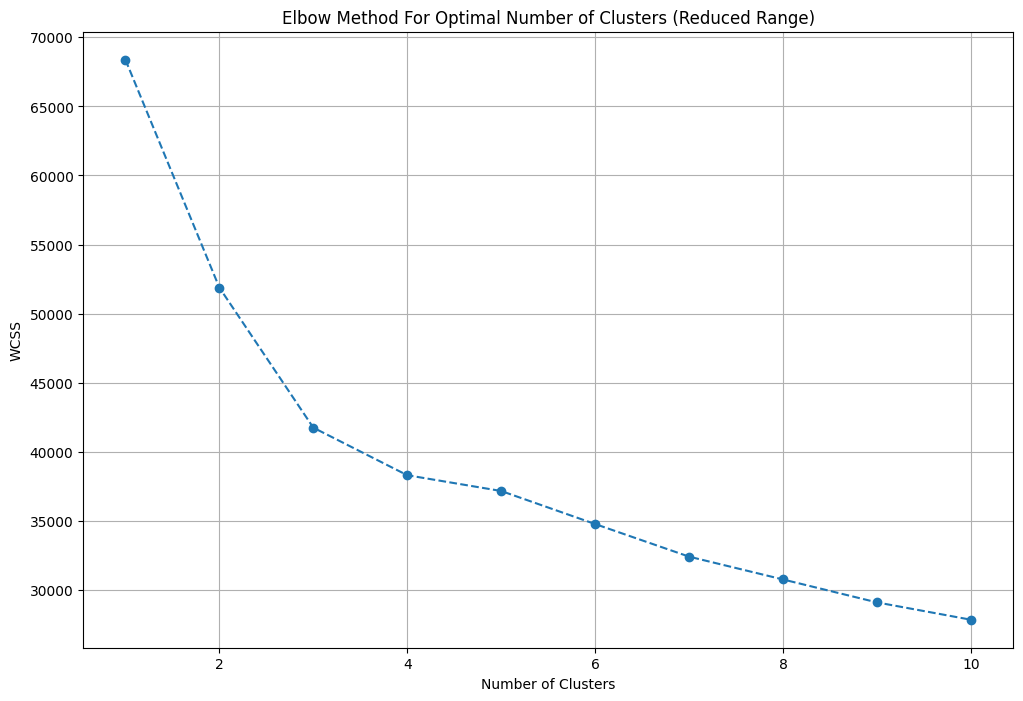

In [225]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [226]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [227]:
df = df.iloc[:,:-18]

In [228]:
df['furnishing_type'] = cluster_assignments

In [230]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2207,NaN,0
2340,"['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
2131,"['1 Exhaust Fan', '4 Geyser', '1 Stove', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
3675,"['5 Fan', '1 Exhaust Fan', '12 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2130,[],0


In [232]:
#features
df[['society','features']].sample(5)

,society,features
2792,antriksh heights,"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
3159,smart world gems,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1754,whiteland the aspen,NaN
2016,Independent,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Club house / Community Center']"
2604,Independent,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"


In [233]:
df['features'].isnull().sum()

np.int64(632)

In [234]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [235]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [236]:
temp_df = df[df['features'].isnull()]

In [237]:
temp_df.shape

(632, 26)

In [238]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [239]:
df.loc[temp_df.index,'features'] = x.values

In [240]:
df['features'].isnull().sum()

np.int64(479)

In [241]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [242]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [244]:
features_binary_df.head()

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [245]:
features_binary_df.shape

(3799, 130)

In [246]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

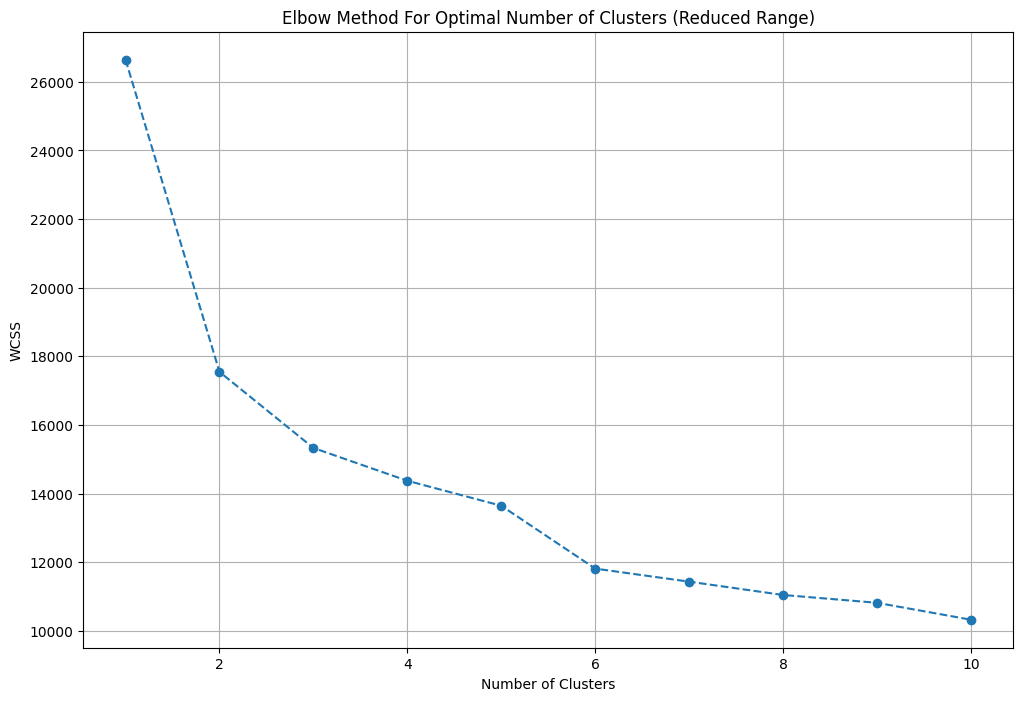

In [247]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [248]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [249]:
df['luxury_score'] = luxury_score

In [250]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,la vida by tata housing,sector 113,3.00,14285.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up area: 2460 sq.ft. (228.54 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),3,3,3+,servant room,3.0,East,Relatively New,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2691.0,2460.0,2100.0,0,1,0,0,0,0,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",167
1,flat,umang monsoon breeze,sector 78,0.88,4746.0,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up area: 1668 sq.ft. (154.96 sq.m.)Carpet area: 1501 sq.ft. (139.45 sq.m.),3,4,3,"pooja room,servant room",8.0,North-West,Moderately Old,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']","['1 Wardrobe', '1 Stove', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1854.0,1668.0,1501.0,0,1,0,1,0,0,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, No open drainage around, Recently Renovated, Bank Attached Property, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",111
2,flat,ireo the grand arch,sector 

In [251]:
#cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [252]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
652,flat,m3m heights,sector 65,2.15,15003.0,1433.0,Built Up area: 1433 (133.13 sq.m.),2,2,3+,28.0,East,Undefined,NaN,1433.0,NaN,0,0,0,0,0,0,48
3621,flat,godrej aria,sector 79,1.30,8843.0,1470.0,Super Built up area 1470(136.57 sq.m.),2,2,2,7.0,NaN,Relatively New,1470.0,NaN,NaN,1,0,0,0,0,2,116
3436,flat,senate court,sector 62,0.90,14084.0,639.0,Built Up area: 639 (59.37 sq.m.),1,1,0,0.0,NaN,Undefined,NaN,639.0,NaN,0,0,0,0,0,0,0
3257,flat,dlf the skycourt,sector 86,1.60,8294.0,1929.0,Super Built up area 1929(179.21 sq.m.),3,3,1,14.0,North-East,Relatively New,1929.0,NaN,NaN,0,0,0,1,0,0,72
1559,flat,kiran residency,sector 56,1.54,8324.0,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.),3,4,3+,5.0,South,Old Property,2000.0,1900.0,1850.0,0,1,0,0,0,2,98


In [253]:
df.shape

(3799, 23)

In [254]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)